<a href="https://colab.research.google.com/github/BMugo84/cs50AI/blob/main/TRAFFIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [ ]:
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

Mounted at /content/drive


In [ ]:
# fetch dataset from drive
from google.colab import drive

drive.mount('/content/drive')

import zipfile

# specify the path to the zip
zip_file_path = "/content/drive/MyDrive/week_5/gtsrb.zip"

# specify target directory ie where the file will be unzipped to
target_dir = "/content"

# unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(target_dir)

# store the extracted dir path in the data_dir variable
data_dir = target_dir + "/extracted_folder"

# Print the data_dir variable
print(f"Data directory: {data_dir}")

Mounted at /content/drive
Data directory: /content/extracted_folder


In [ ]:
!ls "/content"

drive  gtsrb  sample_data


In [ ]:
def main():

    # Check command-line arguments
    if len(sys.argv) not in [2, 3]:
        sys.exit("Usage: python traffic.py data_directory [model.h5]")

    # Get image arrays and labels for all image files
    images, labels = load_data(sys.argv[1])

    # Split data into training and testing sets
    labels = tf.keras.utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels), test_size=TEST_SIZE
    )

    # Get a compiled neural network
    model = get_model()

    # Fit model on training data
    model.fit(x_train, y_train, epochs=EPOCHS)

    # Evaluate neural network performance
    model.evaluate(x_test,  y_test, verbose=2)

    # Save model to file
    if len(sys.argv) == 3:
        filename = sys.argv[2]
        model.save(filename)
        print(f"Model saved to {filename}.")

In [ ]:
data_dir = os.path.join('/content','gtsrb')
os.listdir(data_dir)

traffic_dirs = os.listdir(data_dir)
for dir in traffic_dirs:
  images_path = os.path.join(data_dir, dir)
  image_files = os.listdir(images_path)
  for img in image_files:
    print(img)

Sure, here's a breakdown of how you can implement the `load_data` function:

1. **Iterate Through Categories:**
   - Use functions like `os.listdir` to get a list of directories within the `data_dir`.
   - Iterate through each directory, which represents a category (0 through `NUM_CATEGORIES - 1`).

2. **Read Images:**
   - Within each category directory, use functions like `os.listdir` again to get a list of image files.
   - Iterate through each image file and read it using OpenCV-Python (`cv2.imread`). This will give you a NumPy array representing the image.

3. **Resize Images:**
   - Resize each image to a fixed size using OpenCV-Python's `cv2.resize` function. You'll need to specify the width (`IMG_WIDTH`) and height (`IMG_HEIGHT`) to resize the images to.

4. **Append to Lists:**
   - As you read and resize each image, append it to a list (e.g., `images`) and append the corresponding category number to another list (e.g., `labels`). The category number can be derived from the directory name.

5. **Return Data:**
   - Once you've processed all images in all categories, return a tuple `(images, labels)` where `images` is the list of resized image arrays and `labels` is the list of corresponding category numbers.

6. **Platform Independence:**
   - To ensure platform independence, use `os.path.join` to construct file paths instead of hardcoding path separators. This ensures your code works across different operating systems without modification.

By following these steps, you should be able to implement the `load_data` function that reads images from a directory, resizes them, and returns the image arrays along with their corresponding labels. Let me know if you need further clarification on any of these steps!

In [ ]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    # init a list to store numpy arrays and a list to store categories
    images = []
    labels = []
    # iterate though each directory to find the image path
    for dir in range(NUM_CATEGORIES):
      images_path = os.path.join(data_dir, str(dir))
      image_files = os.listdir(images_path)
      for img in image_files:
        img_path = os.path.join(images_path, img)

        # read the image using cv2.imread and the image path

        img_read = cv2.imread(img_path)

        # resize image using cv2.resize
        resized_img = cv2.resize(img_read, (IMG_WIDTH, IMG_HEIGHT))

        # append to a list
        images.append(resized_img)
        labels.append(dir)

    return images, labels




In [ ]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    # create a convolution neural network
    model = tf.keras.models.Sequential([

        # convolutional layer. learn 32 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
        ),

        # max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten units
        tf.keras.layers.Flatten(),

        # add a hiden layer with dropout
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),

        # add an output layer with output units of all 42 categories
        tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax')


    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# Get image arrays and labels for all image files
images, labels = load_data(data_dir)

# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

# Get a compiled neural network
model = get_model()

# Fit model on training data
hist_m1 = model.fit(x_train, y_train, epochs=EPOCHS)
loss_m1 = hist_m1.history['loss']
accuracy_m1 = hist_m1.history['accuracy']

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

model.summary()

Epoch 1/10
500/500 [==============================] - 3s 3ms/step - loss: 4.4984 - accuracy: 0.0519
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 3.5872 - accuracy: 0.0574
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 3.5392 - accuracy: 0.0564
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 3.5170 - accuracy: 0.0574
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 3.5070 - accuracy: 0.0574
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 3.5024 - accuracy: 0.0574
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 3.5001 - accuracy: 0.0574
Epoch 8/10
500/500 [==============================] - 2s 3ms/step - loss: 3.4989 - accuracy: 0.0574
Epoch 9/10
500/500 [==============================] - 2s 3ms/step - loss: 3.4984 - accuracy: 0.0574
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 3.4981 - accuracy: 0.0574

In [ ]:

hist_m1 = model.fit(x_train, y_train, epochs=EPOCHS)
loss_m1 = hist_m1.history['loss']
accuracy_m1 = hist_m1.history['accuracy']
print(loss_m1)

Epoch 1/10
500/500 [==============================] - 2s 4ms/step - loss: 3.4939 - accuracy: 0.0565
Epoch 2/10
500/500 [==============================] - 2s 5ms/step - loss: 3.4938 - accuracy: 0.0576
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 3.4938 - accuracy: 0.0575
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 3.4938 - accuracy: 0.0569
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 3.4938 - accuracy: 0.0576
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 3.4937 - accuracy: 0.0576
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 3.4937 - accuracy: 0.0561
Epoch 8/10
500/500 [==============================] - 2s 3ms/step - loss: 3.4937 - accuracy: 0.0561
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 3.4937 - accuracy: 0.0556
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 3.4937 - accuracy: 0.0576

In [ ]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    # create a convolution neural network
    model = tf.keras.models.Sequential([

        # convolutional layer. learn 32 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
        ),

        # max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # convolutional layer. learn 32 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            filters=32, kernel_size=(3,3), activation='relu'
        ),

        # max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # # convolutional layer. learn 32 filters using a 3x3 kernel
        # tf.keras.layers.Conv2D(
        #     filters=32, kernel_size=(3,3), activation='relu'
        # ),

        # # max-pooling layer, using 2x2 pool size
        # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten units
        tf.keras.layers.Flatten(),

        # add a hiden layer with dropout
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),

        # add an output layer with output units of all 42 categories
        tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax')


    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# Get image arrays and labels for all image files
images, labels = load_data(data_dir)

# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

# Get a compiled neural network
model = get_model()

# Fit model on training data
hist_m2 = model.fit(x_train, y_train, epochs=EPOCHS)
loss_m2 = hist_m2.history['loss']
accuracy_m2 = hist_m2.history['accuracy']

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

model.summary()

Epoch 1/10
500/500 [==============================] - 3s 4ms/step - loss: 2.9048 - accuracy: 0.3001
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 1.3166 - accuracy: 0.6060
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 0.8524 - accuracy: 0.7365
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.6180 - accuracy: 0.8067
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5005 - accuracy: 0.8479
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4066 - accuracy: 0.8731
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3668 - accuracy: 0.8876
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3102 - accuracy: 0.9043
Epoch 9/10
500/500 [==============================] - 3s 5ms/step - loss: 0.2992 - accuracy: 0.9070
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2530 - accuracy: 0.9215

In [ ]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    # create a convolution neural network
    model = tf.keras.models.Sequential([

        # convolutional layer. learn 32 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
        ),

        # max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # convolutional layer. learn 32 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            filters=32, kernel_size=(3,3), activation='relu'
        ),

        # max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # convolutional layer. learn 32 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            filters=32, kernel_size=(3,3), activation='relu'
        ),

        # max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten units
        tf.keras.layers.Flatten(),

        # add a hiden layer with dropout
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),

        # add an output layer with output units of all 42 categories
        tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax')


    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# Get image arrays and labels for all image files
images, labels = load_data(data_dir)

# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

# Get a compiled neural network
model = get_model()

# Fit model on training data
hist_m3 = model.fit(x_train, y_train, epochs=EPOCHS)
loss_m3 = hist_m3.history['loss']
accuracy_m3 = hist_m3.history['accuracy']

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

model.summary()

Epoch 1/10
500/500 [==============================] - 3s 4ms/step - loss: 4.0267 - accuracy: 0.1309
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 2.3648 - accuracy: 0.3220
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 1.8585 - accuracy: 0.4409
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 1.5105 - accuracy: 0.5345
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 1.2379 - accuracy: 0.6188
Epoch 6/10
500/500 [==============================] - 2s 5ms/step - loss: 1.0298 - accuracy: 0.6794
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.8771 - accuracy: 0.7245
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.7795 - accuracy: 0.7648
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 0.6819 - accuracy: 0.7898
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 0.6370 - accuracy: 0.8087

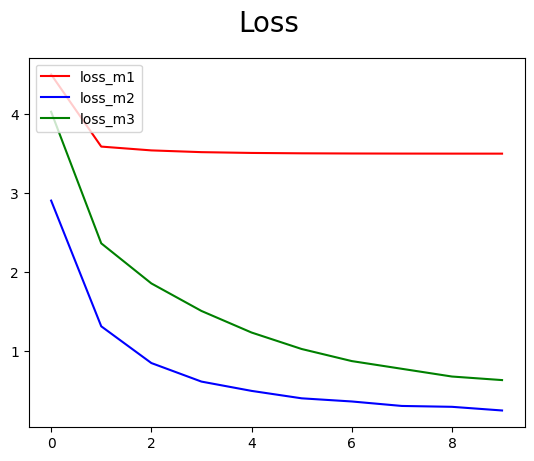

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(loss_m1, color='red', label='loss_m1')
plt.plot(loss_m2, color='blue', label='loss_m2')
plt.plot(loss_m3, color='green', label='loss_m3')

fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()


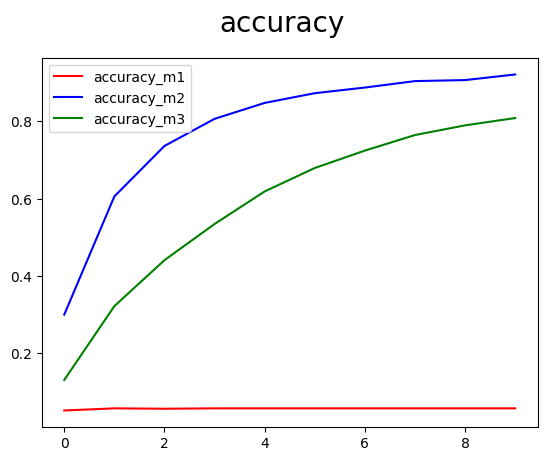

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(accuracy_m1, color='red', label='accuracy_m1')
plt.plot(accuracy_m2, color='blue', label='accuracy_m2')
plt.plot(accuracy_m3, color='green', label='accuracy_m3')

fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()